In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import yfinance as yf

In [3]:
# Download data for GOOGLE from 2019 to 2024
data = yf.download('GOOG', start='2021-01-01', end='2025-01-01')

/tmp/ipython-input-2812932603.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('GOOG', start='2021-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2021-01-04,85.901398,87.512321,84.887921,87.357737,38038000
2021-01-05,86.531654,86.867162,85.393173,85.740360,22906000
2021-01-06,86.251801,86.883543,84.448016,84.628447,52042000
2021-01-07,88.834450,88.891605,86.339280,86.488888,45300000
2021-01-08,89.826561,89.957284,88.152764,88.870748,41012000


In [5]:
df = data.copy()

In [6]:
df.columns = df.columns.droplevel(1)


df.columns.name = None
df = df.rename_axis('Date').reset_index()

In [7]:
df.head()

,Date,Close,High,Low,Open,Volume
0,2021-01-04,85.901398,87.512321,84.887921,87.357737,38038000
1,2021-01-05,86.531654,86.867162,85.393173,85.740360,22906000
2,2021-01-06,86.251801,86.883543,84.448016,84.628447,52042000
3,2021-01-07,88.834450,88.891605,86.339280,86.488888,45300000
4,2021-01-08,89.826561,89.957284,88.152764,88.870748,41012000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1005 non-null   datetime64[ns]
 1   Close   1005 non-null   float64       
 2   High    1005 non-null   float64       
 3   Low     1005 non-null   float64       
 4   Open    1005 non-null   float64       
 5   Volume  1005 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 47.2 KB


In [9]:
df.shape

(1005, 6)

EDA

In [10]:
df.describe()

,Date,Close,High,Low,Open,Volume
count,1005,1005.000000,1005.000000,1005.000000,1005.000000,1.005000e+03
mean,2023-01-01 04:52:17.910447872,130.715168,132.113081,129.298038,130.628077,2.478795e+07
min,2021-01-04 00:00:00,82.996651,86.038574,82.956886,84.628447,6.809800e+06
25%,2021-12-31 00:00:00,110.580185,111.400823,108.405620,110.125398,1.783030e+07
50%,2022-12-30 00:00:00,130.911850,132.224036,129.361072,130.752788,2.243790e+07
75%,2024-01-02 00:00:00,144.602478,145.952912,143.580531,144.660128,2.867800e+07
max,2024-12-31 00:00:00,197.696869,202.405850,196.230314,198.066010,9.779860e+07
std,NaN,25.844953,25.987439,25.727927,25.895031,1.044662e+07


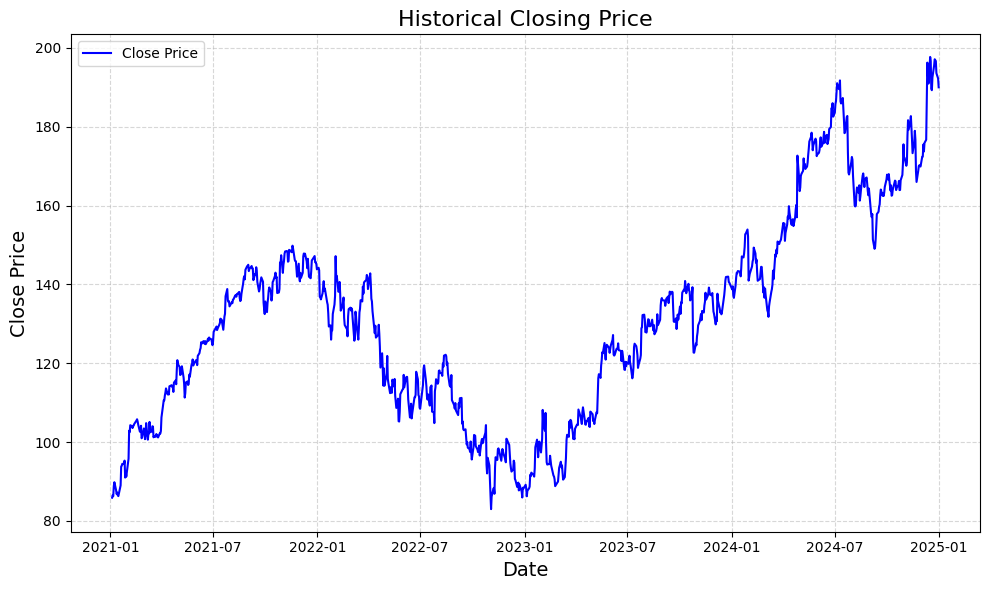

In [11]:
# Plot historical closing price
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')

plt.title("Historical Closing Price", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Close Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

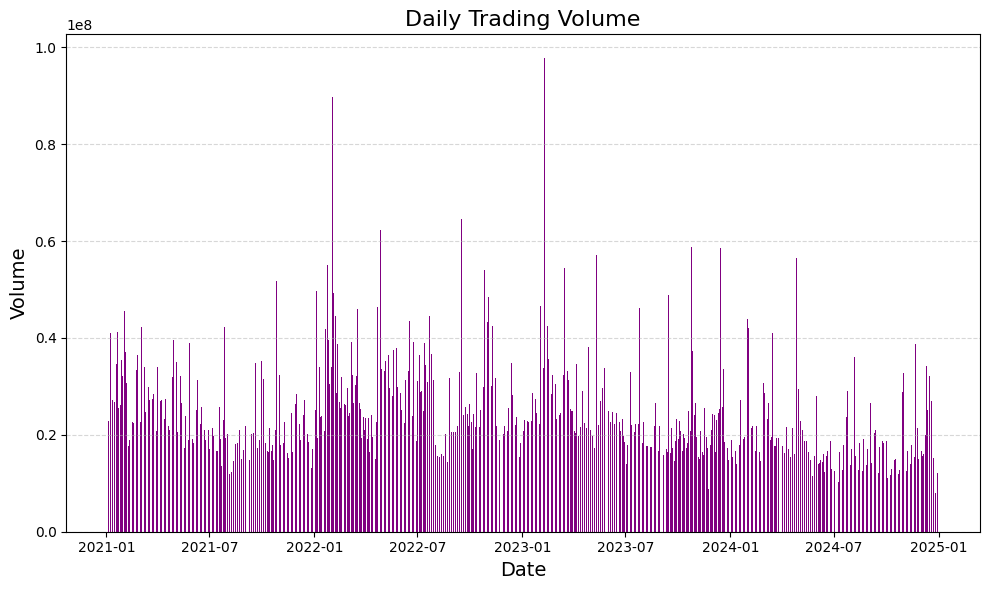

In [12]:
# Plot daily trading volume
plt.figure(figsize=(10, 6))
plt.bar(df['Date'], df['Volume'], color='purple')

plt.title("Daily Trading Volume", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Volume", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

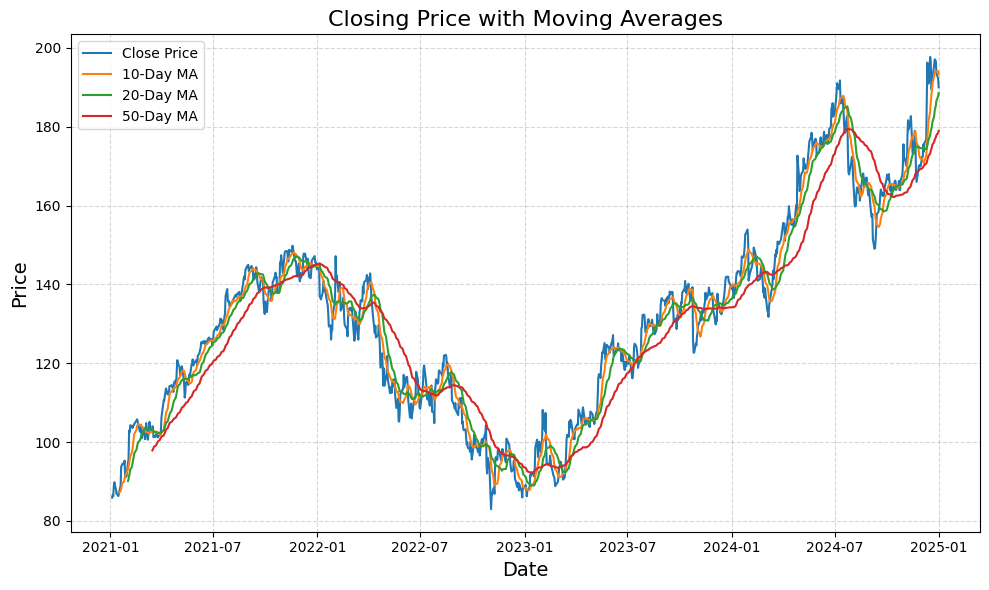

In [13]:
# Define moving average windows
ma_days = [10, 20, 50]

# Compute moving averages
for ma in ma_days:
    column_name = f"MA_{ma}"
    df[column_name] = df['Close'].rolling(ma).mean()

# Plot Close and moving averages
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', linewidth=1.5)
for ma in ma_days:
    plt.plot(df['Date'], df[f"MA_{ma}"], label=f"{ma}-Day MA")

plt.title("Closing Price with Moving Averages", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


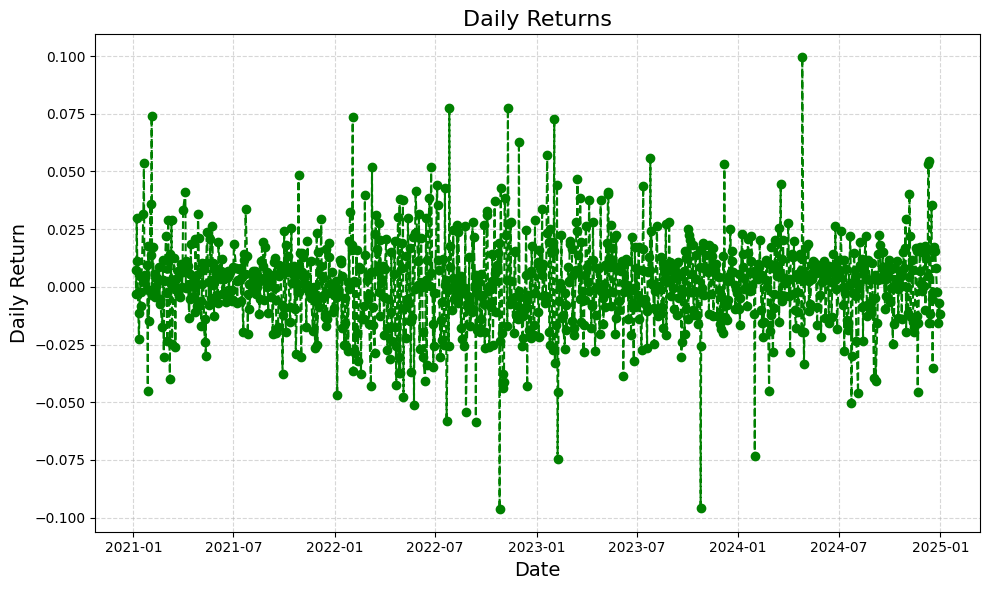

In [14]:
# Calculate daily return
df['Daily Return'] = df['Close'].pct_change()

# Plot daily return
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Daily Return'], linestyle='--', marker='o', color='green')

plt.title("Daily Returns", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Daily Return", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

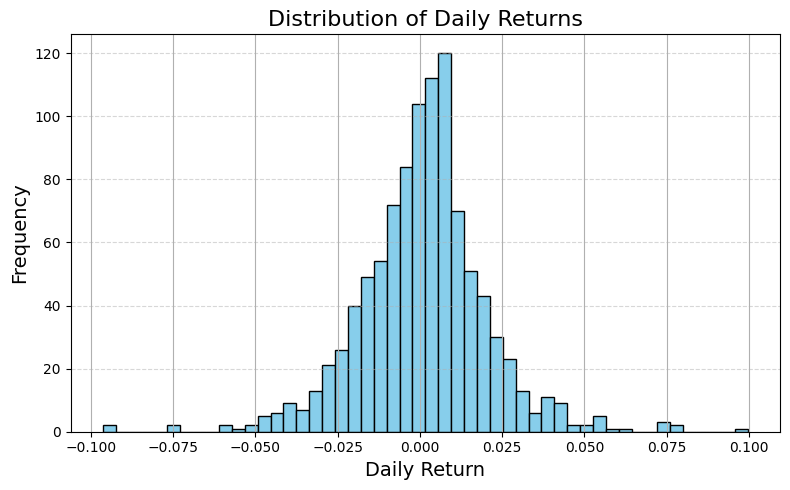

In [15]:
# Plot histogram of daily returns
plt.figure(figsize=(8, 5))
df['Daily Return'].hist(bins=50, color='skyblue', edgecolor='black')

plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Daily Returns', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

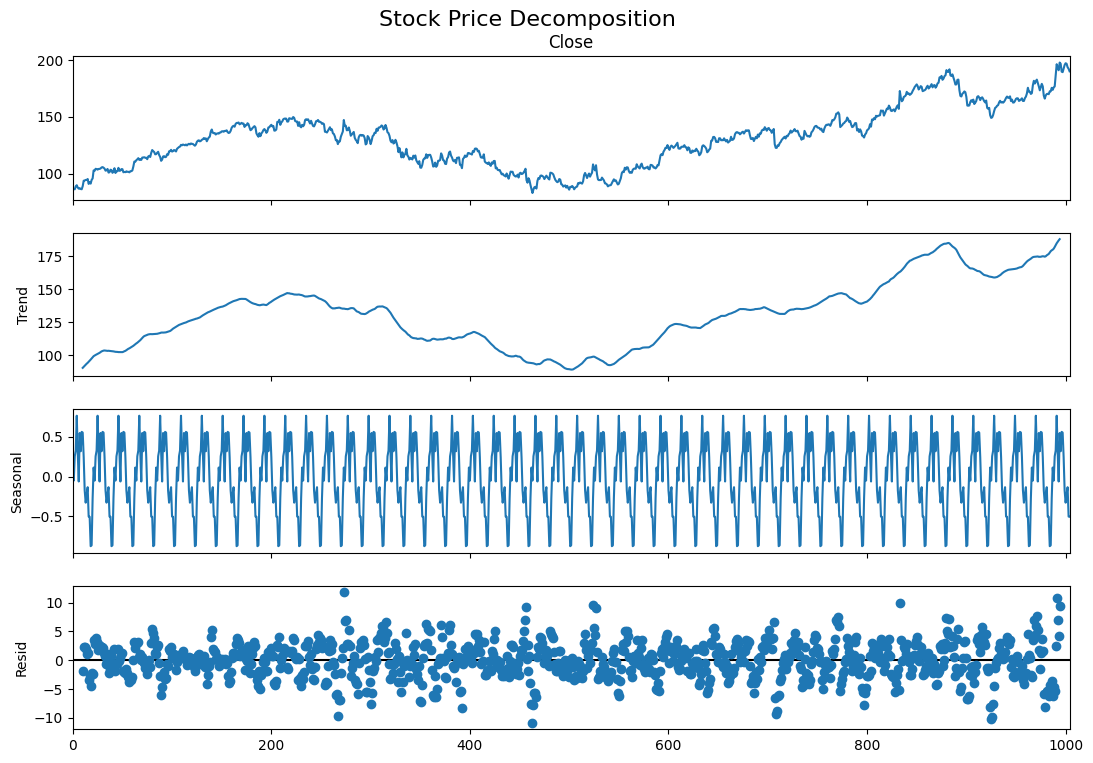

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Close'], model='additive', period=21)

# Plot decomposition
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Stock Price Decomposition', fontsize=16)
plt.show()

ADF Statistics

In [17]:
from statsmodels.tsa.stattools import adfuller
# Run ADF test on Close prices
result = adfuller(df['Close'].dropna())

# Print results
print(f'ADF Statistic: {result[0]:.6f}')
print(f'p-value: {result[1]:.6f}')

# Interpretation
if result[1] < 0.05:
    print("The series is stationary")
else:
    print("The series is non-stationary")

ADF Statistic: -1.136910
p-value: 0.700131
The series is non-stationary


In [18]:
close_diff = df['Close'].diff().dropna()

result = adfuller(close_diff)
print(f'ADF Statistic: {result[0]:.4f}')
print(f'p-value: {result[1]:.4f}')

if result[1] < 0.05:
    print("The series is stationary")
else:
    print("The series is non-stationary")

ADF Statistic: -19.9155
p-value: 0.0000
The series is stationary


PACF and ACF Plots

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

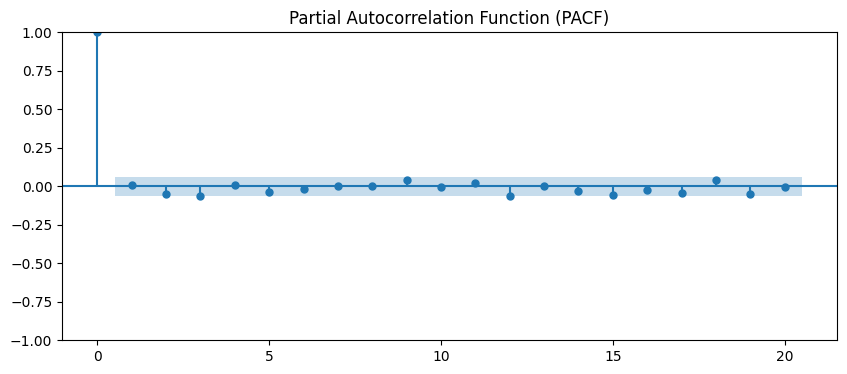

In [20]:
# Plot the PACF
fig_pacf = plot_pacf(close_diff, lags=20, title='Partial Autocorrelation Function (PACF)')
fig_pacf.set_size_inches(10, 4)
plt.show()

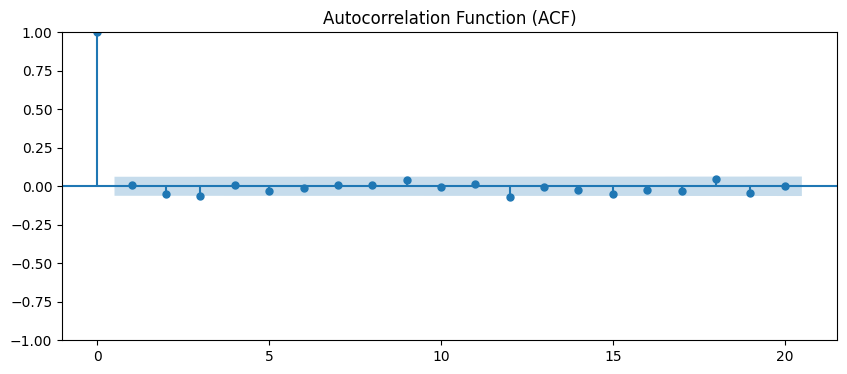

In [21]:
# Plot the ACF
fig_acf = plot_acf(close_diff, lags=20, title='Autocorrelation Function (ACF)')
fig_acf.set_size_inches(10, 4)
plt.show()

ARIMA

In [22]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(1,1,1)
model = ARIMA(df.Close, order=(1, 1, 1))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1005
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2328.296
Date:                Fri, 15 Aug 2025   AIC                           4662.592
Time:                        17:59:37   BIC                           4677.327
Sample:                             0   HQIC                          4668.191
                               - 1005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8583      0.150      5.703      0.000       0.563       1.153
ma.L1         -0.8836      0.138     -6.387      0.000      -1.155      -0.612
sigma2         6.0505      0.157     38.651      0.0

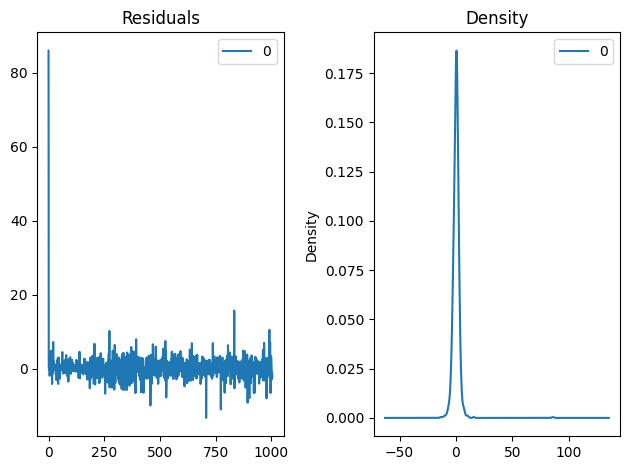

In [23]:
# Get residuals from model fit
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1, 2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])

plt.tight_layout()
plt.show()

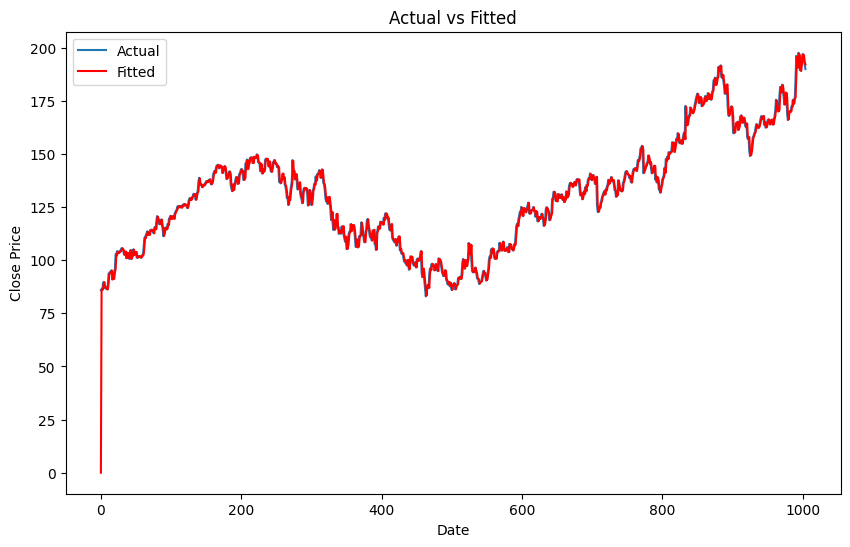

In [24]:
# Actual vs Fitted
# Get predictions
predictions = model_fit.get_prediction(start=0, dynamic=False)
predicted_mean = predictions.predicted_mean

# Plot actual vs fitted
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Actual')
plt.plot(predicted_mean.index, predicted_mean, color='red', label='Fitted')
plt.title('Actual vs Fitted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [25]:
from statsmodels.tsa.stattools import acf

# Example: 80% training, 20% testing
split_index = int(len(df) * 0.8)

train = df['Close'][:split_index]
test = df['Close'][split_index:]

print(f"Training data length: {len(train)}")
print(f"Testing data length: {len(test)}")

Training data length: 804
Testing data length: 201


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


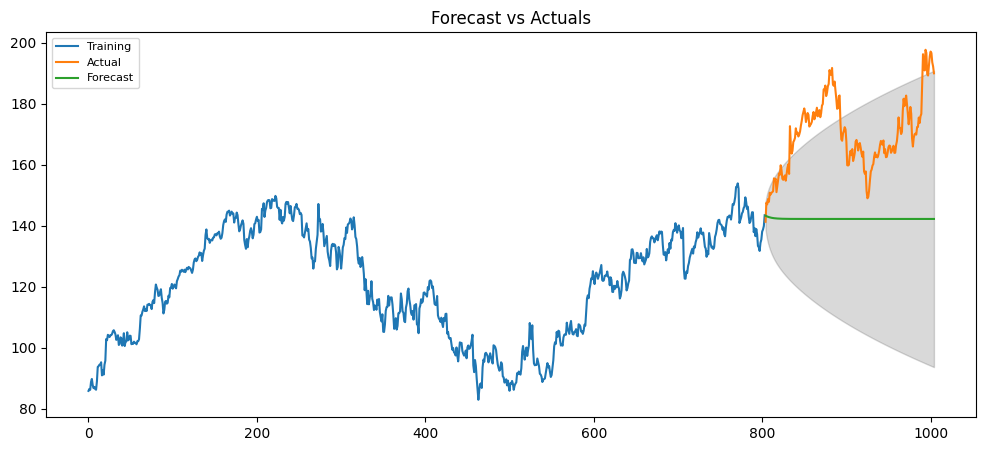

In [26]:
from statsmodels.tsa.arima.model import ARIMA

# Build and fit the model
model = ARIMA(train, order=(1, 1, 1))
fitted = model.fit()

# Forecast
forecast_results = fitted.forecast(len(test))

# Extract forecast, standard errors, and confidence intervals
fc = forecast_results
conf = fitted.get_forecast(len(test)).conf_int(alpha=0.05) # Get confidence intervals


# Convert to series for plotting
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf.iloc[:, 0].values, index=test.index)
upper_series = pd.Series(conf.iloc[:, 1].values, index=test.index)


# Plot forecast vs actuals
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.index, train, label='Training') # Plot train with its index
plt.plot(test.index, test, label='Actual') # Plot test with its index
plt.plot(fc_series.index, fc_series, label='Forecast') # Plot forecast with its index
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [27]:
# Evaluation Metrics for ARIMA
print("ARIMA Evaluation Metrics: \n")
def forecast_accuracy(forecast, actual):
    forecast = np.array(forecast)
    actual = np.array(actual)

    mape = np.mean(np.abs(forecast - actual) / np.abs(actual))  # MAPE
    mae = np.mean(np.abs(forecast - actual))                    # MAE
    rmse = np.sqrt(np.mean((forecast - actual) ** 2))           # RMSE


    print('MAPE', mape)
    print('MAE', mae)
    print('RMSE', rmse)

forecast_accuracy(fc, test)

ARIMA Evaluation Metrics: 

MAPE 0.15946408223222383
MAE 27.808408795450365
RMSE 30.225316121651932


SARIMA

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [29]:
model_full = SARIMAX(df['Close'],
                     order=(1, 1, 2),
                     seasonal_order=(1, 1, 1, 12),
                     enforce_stationarity=False,
                     enforce_invertibility=False)

results_full = model_full.fit(disp=False)
print(results_full.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                 1005
Model:             SARIMAX(1, 1, 2)x(1, 1, [1], 12)   Log Likelihood               -2291.030
Date:                              Fri, 15 Aug 2025   AIC                           4594.060
Time:                                      17:59:43   BIC                           4623.367
Sample:                                           0   HQIC                          4605.211
                                             - 1005                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5591      0.299      1.868      0.062      -0.028       1.146
ma.L1         -0.55

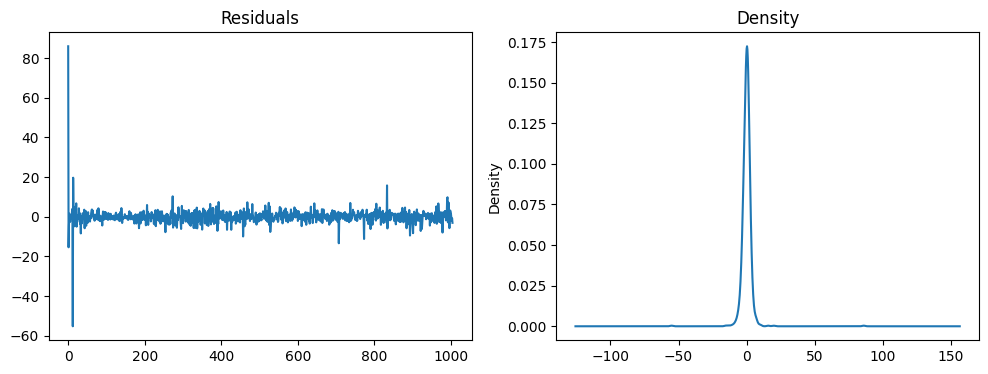

In [30]:
residuals = results_full.resid
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

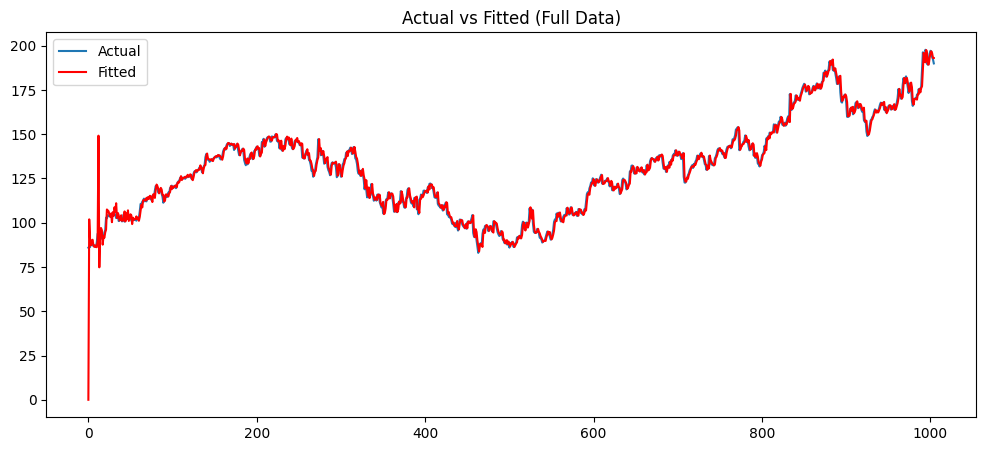

In [31]:
plt.figure(figsize=(12, 5))
plt.plot(df['Close'], label='Actual')
plt.plot(results_full.fittedvalues, label='Fitted', color='red')
plt.title("Actual vs Fitted (Full Data)")
plt.legend()
plt.show()

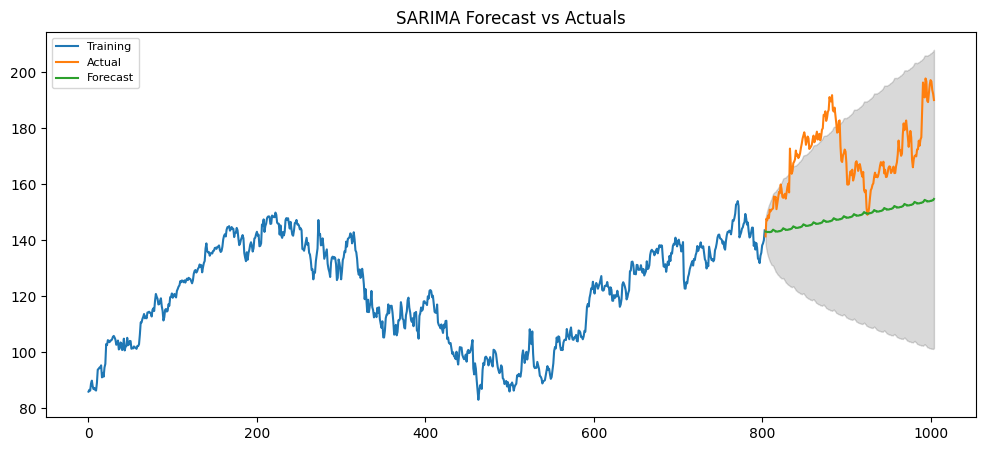

In [32]:
split_index = int(len(df) * 0.8)
train = df['Close'][:split_index]
test = df['Close'][split_index:]

model = SARIMAX(train,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()

# Forecast
fc = results.forecast(steps=len(test))
conf = results.get_forecast(steps=len(test)).conf_int(alpha=0.05)

# Convert to Series
fc_series = pd.Series(fc.values, index=test.index)
lower_series = pd.Series(conf.iloc[:, 0].values, index=test.index)
upper_series = pd.Series(conf.iloc[:, 1].values, index=test.index)

# Plot Forecast vs Actuals
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.index, train, label='Training')
plt.plot(test.index, test, label='Actual')
plt.plot(fc_series.index, fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('SARIMA Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [33]:
# Evaluation Metrics for SARIMA
print("SARIMA Evaluation Metrics: \n")
def forecast_accuracy(forecast, actual):
    forecast = np.array(forecast)
    actual = np.array(actual)

    mape = np.mean(np.abs(forecast - actual) / np.abs(actual))  # MAPE
    mae = np.mean(np.abs(forecast - actual))                    # MAE
    rmse = np.sqrt(np.mean((forecast - actual) ** 2))           # RMSE


    print('MAPE', mape)
    print('MAE', mae)
    print('RMSE', rmse)

forecast_accuracy(fc, test)

SARIMA Evaluation Metrics: 

MAPE 0.12413201917639417
MAE 21.719623092277537
RMSE 24.246341825054444


Holt - Winters

In [34]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
y = df['Close']

In [36]:
SEASONAL_PERIODS = 21
hw_full = ExponentialSmoothing(
    y,
    trend='add',
    seasonal='add',
    seasonal_periods=SEASONAL_PERIODS,
    damped_trend=True,
    initialization_method="estimated"
).fit()

print(hw_full.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                 1005
Model:             ExponentialSmoothing   SSE                           5974.813
Optimized:                         True   AIC                           1843.478
Trend:                         Additive   BIC                           1971.209
Seasonal:                      Additive   AICC                          1845.142
Seasonal Periods:                    21   Date:                 Fri, 15 Aug 2025
Box-Cox:                          False   Time:                         17:59:49
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               1.0000000                alpha                 True
smoothing_trend          

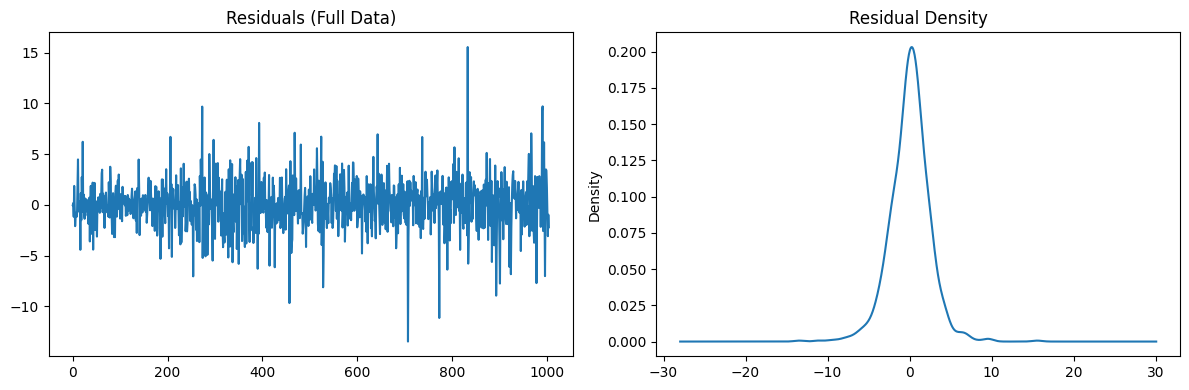

In [37]:
resid_full = y - hw_full.fittedvalues

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
resid_full.plot(ax=ax[0], title='Residuals (Full Data)', legend=False)
resid_full.plot(kind='kde', ax=ax[1], title='Residual Density', legend=False)
plt.tight_layout()
plt.show()

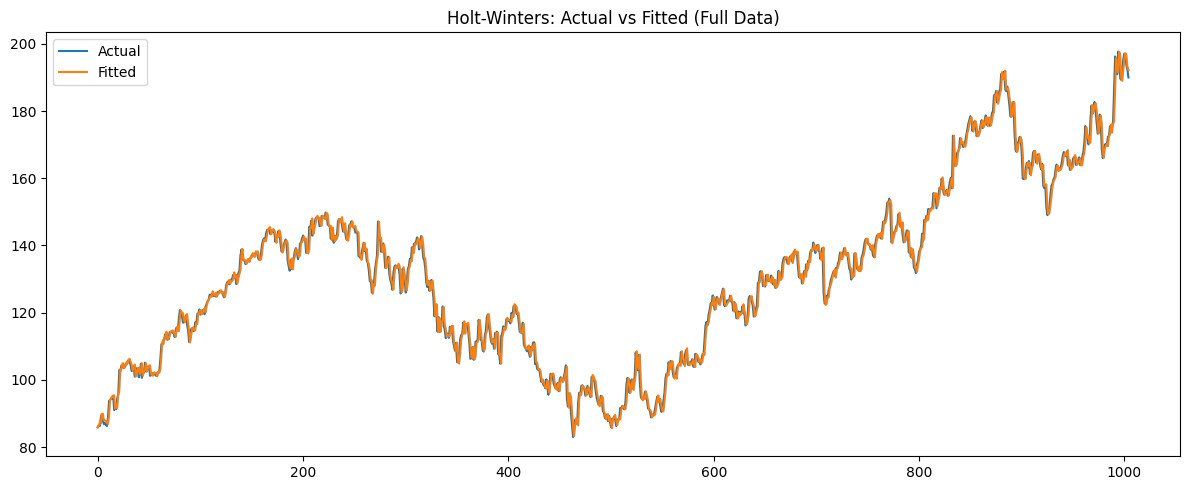

In [38]:
plt.figure(figsize=(12, 5))
plt.plot(y.index, y, label='Actual')
plt.plot(y.index, hw_full.fittedvalues, label='Fitted')
plt.title('Holt-Winters: Actual vs Fitted (Full Data)')
plt.legend()
plt.tight_layout()
plt.show()

In [39]:
split_idx = int(len(y) * 0.8)
train, test = y.iloc[:split_idx], y.iloc[split_idx:]

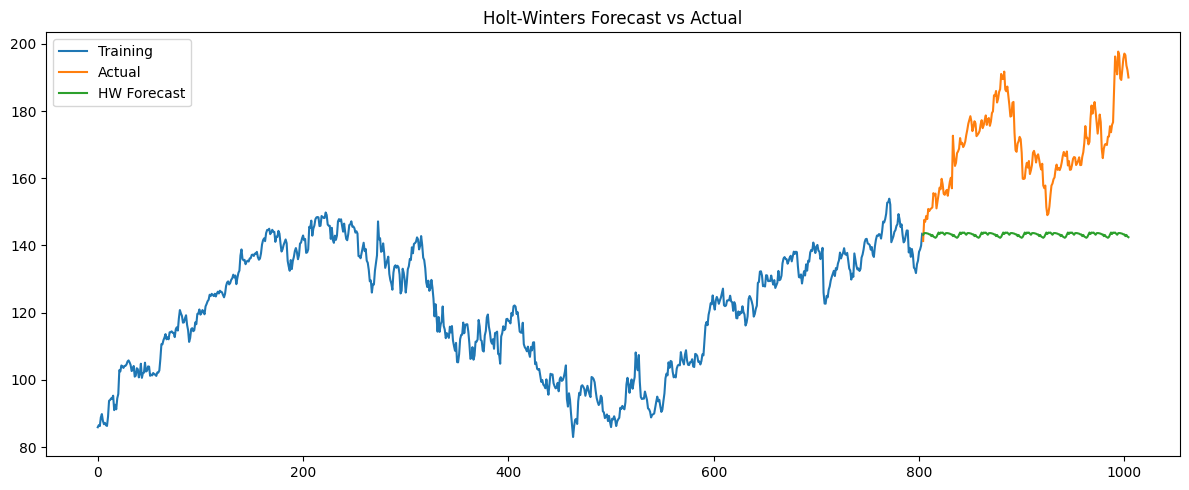

In [40]:
hw_train = ExponentialSmoothing(
    train,
    trend='add',
    seasonal='add',
    seasonal_periods=SEASONAL_PERIODS,
    damped_trend=True,
    initialization_method="estimated"
).fit()

h = len(test)
hw_fc = hw_train.forecast(h)

plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Training')
plt.plot(test.index, test, label='Actual')
plt.plot(hw_fc.index, hw_fc, label='HW Forecast')
plt.title('Holt-Winters Forecast vs Actual')
plt.legend()
plt.tight_layout()
plt.show()

In [41]:
def metrics(forecast, actual):
    mae  = mean_absolute_error(actual, forecast)
    rmse = mean_squared_error(actual, forecast)
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    return {"MAE": mae, "RMSE": rmse, "MAPE(%)": mape}

print("HW Forecast Metrics:", metrics(hw_fc, test))

HW Forecast Metrics: {'MAE': 26.812893466727306, 'RMSE': 857.8533786083947, 'MAPE(%)': np.float64(15.361102818582149)}


LSTM

In [42]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .80 ))

training_data_len

804

In [43]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02532469],
       [0.0308195 ],
       [0.02837963],
       ...,
       [0.96416413],
       [0.95242194],
       [0.93285135]])

In [44]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.02532469, 0.0308195 , 0.02837963, 0.05089615, 0.05954575,
       0.04199957, 0.03325911, 0.03666093, 0.0304987 , 0.02876981,
       0.05246053, 0.09407884, 0.0959639 , 0.10021061, 0.09949563,
       0.10722645, 0.069764  , 0.08376959, 0.071909  , 0.10034058,
       0.11167696, 0.17345432, 0.17011755, 0.18555756, 0.18335183,
       0.17927846, 0.18442227, 0.18464324, 0.18820523, 0.1959145 ,
       0.19869214, 0.19387784, 0.18691821, 0.17120528, 0.17379668,
       0.18433114, 0.1566796 , 0.15906293, 0.17841169, 0.17595472,
       0.15466449, 0.16436279, 0.19012495, 0.15356386, 0.16592711,
       0.16693689, 0.19282483, 0.16992252, 0.1719029 , 0.18318281,
       0.18255889, 0.15878562, 0.16181044, 0.15981256, 0.16603985,
       0.16261634, 0.1623131 , 0.15849528, 0.16733552, 0.16715779])]
[np.float64(0.1728302678457817)]

[array([0.02532469, 0.0308195 , 0.02837963, 0.05089615, 0.05954575,
       0.04199957, 0.03325911, 0.03666093, 0.0304987 , 0.02876981,
       0.05246053, 0.094

In [45]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


744/744 ━━━━━━━━━━━━━━━━━━━━ 50s 63ms/step - loss: 0.0053


In [46]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE) and Mean Absolute Percentage Error (MAPE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
mape = np.mean(np.abs((predictions - y_test) / y_test)) * 100

print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step
RMSE: 7.5039
MAPE: 3.7819%


/tmp/ipython-input-2540037427.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


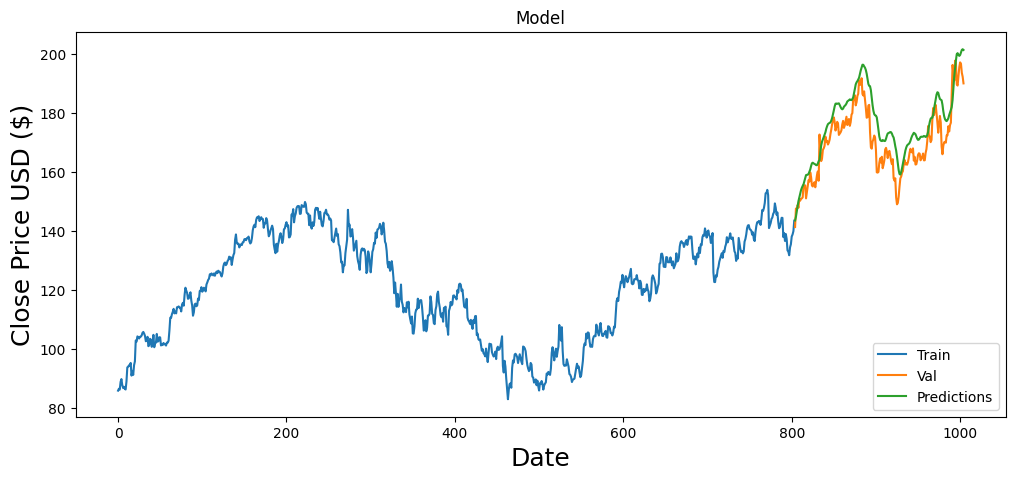

In [47]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(12,5))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()